#  PRÁCTICA 5 CAN-GIA. Resolución numérica de ecuaciones no lineales, interpolación y derivación numérica.  

En esta práctica veremos cómo resolver de forma aproximada ecuaciones no lineales usando los métodos de bisección y Newton-Raphson. También veremos cómo se implementa la interpolación de Lagrange y cómo se puede emplear **Python** para aproximar derivadas de funciones mediante derivación numérica. 

## Objetivos. 
 * Cálculo de errores
 * Algoritmo de bisección
 * Método de Newton-Raphson
 * Interpolación de Lagrange. Interpolación lineal a trozos.
 * Derivación numérica

Comenzamos cargando algunas librerías que precisamos en esta práctica:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect 
from scipy.optimize import newton

## 5.1 Errores

Los dos algoritmos que veremos en esta práctica para aproximar raíces de ecuaciones no lineales construyen sucesiones de aproximaciones $(x_k)_{k}$ de una raíz de la ecuación $f(x)=0$. 

El **error absoluto en el paso $k$** se aproxima por: $$ E_a = |x_{k} - x_{k-1}| $$  
El **error relativo en el paso $k$** se aproxima por: $$ E_r = |\frac{x_{k} - x_{k-1}}{x_k}| $$

### Ejercicio 1 
Las primeras aproximaciones de un algoritmo para aproximar una raíz vienen dadas por $(98.1, 98.8, 99.1, 99.12)$.
Calcula los errores absolutos y relativos cuando sea posible.  

In [ ]:
# TU CÓDIGO AQUÍ

errores = [98.1 , 98.8 , 99.1 , 99.12]

for e in range(len(errores)):
    Eabs = np.abs(errores[e] - errores[e -1])
    print("Error absoluto de la iteración", e, ":", Eabs)
    Erel = Eabs / np.abs(errores[e])
    print("Error relativo de la iteración", e, ":", Erel, "\n")

## 5.2 Algoritmo de bisección

El algoritmo de bisección aproxima una raíz de una ecuación basándose en el teorema de Bolzano. Para garantizar que el método funciona correctamente, suponemos que la función que define la ecuación es continua.

Consideramos la ecuación $x^3 - 2x^2 =0$, que tiene dos raíces: $x=0$ (doble) y $x=2$ (simple). 

Construimos a continuación la función que define la ecuación:

In [ ]:
def f(x):
    y = x**3 - 2*x**2
    return y

Para aproximar la raíz $x=2$ de $f$, partimos del intervalo $[1.5,3]$, y consideramos una tolerancia de error absoluto inferior a $10^{-6}$. Escribimos:

In [ ]:
sol1 = bisect(f,1.5,3,xtol = 1e-14)
display('Aproximación por bisección partiendo de [1.5,3]: ',sol1)

In [ ]:
sol1 = bisect(f,-1,1,xtol= 1e-14)
display('Aproximación por bisección partiendo de [-1,1]: ',sol1)

### Ejercicio 2

a) Cambia el intervalo de inicio para aproximar la otra raíz de $f$.  
b) ¿Consigues algún intervalo $[a,b]$ que contenga alguna raíz tal que $f(a)*f(b)<0$ ?  
c) Dibuja la gráfica de $f$ y encuentra un intervalo de longitud $1$ donde converja el algoritmo. Calcula dos iteraciones y los errores asociados si procede.

In [ ]:
# TU CÓDIGO AQUÍ

### Ejercicio 3

El código siguiente implementa el algoritmo de bisección. Ejecuta el código para $f(x)= x^3 - 2 x^2$ en el intervalo $[3,5]$. Comprueba si la aproximación obtenida es raíz de $f$.



In [ ]:
import sympy as sp

x = sp.symbols('x', real=True) # define la variable simbólica x
f_expr =  x**3 - 2*x**2
f = sp.Lambda(x,f_expr)

N_max = 100    # Maximo de iteraciones
tol = 1.e-14   # Tolerancia de error
inf = 3.         # Extremo izquierdo del intervalo inicial
sup = 5.         # Extremo derecho del intervalo inicial

x_aprox = np.zeros(N_max)

  
for k in range(0,N_max):
    x_aprox[k] = (inf + sup) / 2      # Punto medio del intervalo [a,b]
    
    if np.abs(f(x_aprox[k])) < tol: 
       break                   # x_aprox[k] es una raiz 
    if f(inf) * f(x_aprox[k]) < 0:
        sup = x_aprox[k]
    else:   # f(x_aprox[k] * f(b) < 0)
        inf = x_aprox[k]
    
    #Criterio de parada 
    if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): 
        break

print('Número de iteraciones realizadas: ', k+1) # Contamos 1 más porque empezamos el bucle en 0
print('Aproximación de la raíz: ', x_aprox[k])
print("Imágen de la aproximación: ", f(x_aprox[k]))

### Ejercicio 4

Modifica el código anterior para evitar la salida errónea que has obtenido. 

In [ ]:
# TU CÓDIGO AQUÍ
import sympy as sp
import numpy as np

x = sp.symbols('x', real=True) 
f_expr =  x**3 - 2*x**2
f = sp.Lambda(x,f_expr)

N_max = 100    # Maximo de iteraciones
tol = 1.e-14   # Tolerancia de error
inf = 3.         # Extremo izquierdo del intervalo inicial
sup = 5.         # Extremo derecho del intervalo inicial

x_aprox = np.zeros(N_max)

# Comprobamos mediante el teorema de bolzano si existe la raiz
if f(inf) * f(sup) > 0:
    print(f"[!] No se cumple el teorema de Bolzano en el intervalo [{inf} , {sup}]")
else:   
    for k in range(0,N_max):
        x_aprox[k] = (inf + sup) / 2      # Punto medio del intervalo [a,b]
    
        if np.abs(f(x_aprox[k])) < tol: 
           break                   # x_aprox[k] es una raiz 
        if f(inf) * f(x_aprox[k]) < 0:
            sup = x_aprox[k]
        else:   # f(x_aprox[k] * f(b) < 0)
            inf = x_aprox[k]

        #Criterio de parada 
        if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): 
            break

    print('Número de iteraciones realizadas: ', k+1) # Contamos 1 más porque empezamos el bucle en 0
    print('Aproximación de la raíz: ', x_aprox[k])
    print("Imágen de la aproximación: ", f(x_aprox[k]))

## 5.3 Método de Newton-Raphson 

El método de Newton-Raphson también permite aproximar una raíz de una ecuación. En este caso, para poder aplicar el método, la función que define la ecuación tiene que ser derivable.

Consideramos de nuevo la ecuación $x^3-2x^2=0$.

In [ ]:
def f(x):
    y = x**3 - 2*x**2
    return y

Para hallar una raíz de $f$ comenzando con la aproximación inicial $x_0=1.5$, escribimos:

In [ ]:
root1 = newton(f, 1.5, tol=1.e-10 ,)  # aproxima la derivada
root2 = newton(f, 1.5, fprime2=lambda x: 3*x**2 - 4 * x) # Emplea la expresión exacta de la derivada
print('Aproximación por Newton-Raphson aproximando la derivada: ',root1)
print('Aproximación por Newton-Raphson usando la derivada exacta: ',root2)

Si comenzamos con una aproximación inicial diferente, el algoritmo converge a otra raíz de $f$:

In [ ]:
root3 = newton(f, -1.5)
print(root3)

### Ejercicio 5

Si ejecutas el algoritmo tomando como aproximación inicial el punto $x_0=\frac{4}{3}$, se obtiene una falsa convergencia. ¿Por qué?

In [ ]:
# TU CÓDIGO AQUÍ
root1 = newton(f, (4/3)) # aproxima la derivada
print(root1)

root2 = newton(f, (4/3), fprime2=lambda x: 3*x**2 - 4 * x)
print(root2)

### Ejercicio 6

Consideramos la función $f$ dada por $ f(x) = x^3 - 2\, x^2 $. Sea $x_0 = 1$.  
a) Calcula $r$, la recta tangente en $x_0$, y a continuación $x_1$, el punto de corte de $r$ con el eje $OX$. Repite el proceso con $x_1$ para obtener el iterante $x_2$.  
b) Calcula los errores relativos en los dos pasos efectuados.  
c) Busca un iterante inicial $x_0$ de modo que el algoritmo de Newton no converja.  

In [ ]:
# TU CÓDIGO AQUÍ

sp.Symbol('x')

def f(x):
    return x**3 -2*x**2

df = sp.diff(f(x), x)

df = sp.Lambda(x, df)

r = f(1) + df(1)*(x - 1)

x_aprox = np.zeros(N_max)
x_aprox[0] = 1.5

N_max = 10
tol = 1.e-9

for k in range(1, N_max):
    if df(x_aprox[k-1]) == 0:
        break

    x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1]) / df(x_aprox[k-1])

    print("Error absoluto", np.abs(x_aprox[k] - x_aprox[k-1]))
    print("Error relativo", np.abs(x_aprox[k] - x_aprox[k-1]) / np.abs(x_aprox[k]))

    if np.abs(x_aprox[k] - x_aprox[k-1]) / np.abs(x_aprox[k]) < tol:
        break 

### Ejercicio 7

a) Ejecuta el código de Newton-Raphson siguiente en las condiciones del ejercicio 5.

b) Modifica el código para que el usuario conozca el problema que surge en la ejecución.

In [ ]:
import numpy as np
import sympy as sp

x = sp.symbols('x', real=True) # define la variable simbólica x

f_expr = x**3 -2*x**2
f_der_expr = sp.diff(f_expr,x)

f = sp.Lambda(x,f_expr)
f_der = sp.Lambda(x,f_der_expr)

N_max = 10
tol = 1.e-9

x_aprox = np.zeros(N_max)
x_aprox[0] = 4./3.

for k in range(1,N_max):
   
    if abs(f_der(x_aprox[k-1])) < 1e-14: 
        print('La derivada vale ',f_der(x_aprox[k-1]))
        print('No se puede ejecutar el algoritmo')
        break

    x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1])/f_der(x_aprox[k-1])

    if ( (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): 
        break


print('Número de iteraciones realizadas: ', k) 
print('Aproximación de la raíz: ', x_aprox[k])

### Ejercicio 8

Para determinar las horas de tiempo de cálculo que invierte un ordenador en realizar una simulación numérica es preciso resolver la ecuación
$$ t- e^{1/t}=0.$$

a) Localiza un intervalo cerrado de longitud $1$ que contenga una raíz $\alpha$ de la ecuación.  

b) Aproxima $\alpha$ mediante el algoritmo de bisección.  

c) Aproxima $\alpha$ mediante el método de Newton-Raphson partiendo del punto medio del intervalo con un error inferior a $10^{-6}$.  


In [ ]:
#TU CÓDIGO AQUÍ
sp.Symbol('x')

def f(x):
    return x - sp.E**(1/x)

df = sp.diff(f(x), x)
df = sp.Lambda(x, df)

N_max = 10

x_aprox = np.zeros(N_max)
x_aprox[0] = 1.5


tol = 1.e-6

for k in range(1, N_max):
    if df(x_aprox[k-1]) == 0:
        break

    x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1]) / df(x_aprox[k-1])

    print("Error absoluto", np.abs(x_aprox[k] - x_aprox[k-1]))
    print("Error relativo", np.abs(x_aprox[k] - x_aprox[k-1]) / np.abs(x_aprox[k]))

    if np.abs(x_aprox[k] - x_aprox[k-1]) / np.abs(x_aprox[k]) < tol:
        break 

print('Número de iteraciones realizadas: ', k)
print(x_aprox[k])
print(f(x_aprox[k]))




## 5.4 Interpolación de Lagrange. Interpolación lineal a trozos.

Dados un conjunto de $n+1$ puntos distintos, $x_0,x_1,\ldots,x_n$, y $n+1$ valores, $y_0,y_1,\ldots,y_n$, en la interpolación de Lagrange se calcula el polinomio $p_n$, de grado menor o igual a $n$, que satisface las $n+1$ condiciones de interpolación: 
$$
p_n(x_i)=y_i,\quad i=0,1,\ldots,n\,.
$$

Importamos los módulos correspondientes:

In [3]:
from scipy import interpolate
# Importamos la interpolación polinómica de Lagrange
from scipy.interpolate import lagrange

Para empezar, interpolamos la función $f(x)=x^3$ con los datos $x_0=-2$, $x_1=0$, $x_2=1$, $x_3=2$, $x_4=5$, $x_5=9$ y $x_6=10$. En este caso, la interpolación es exacta:

63.999999999999865


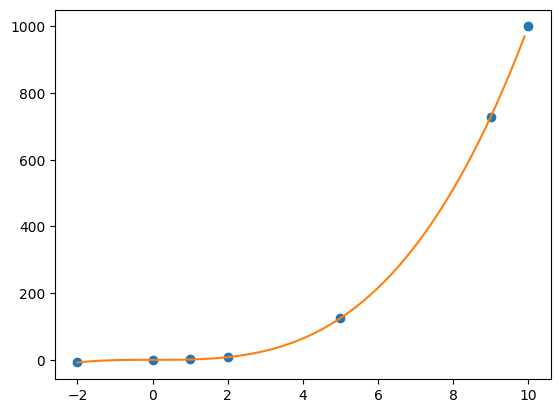

In [7]:
xn = np.array([-2,0,1,2,5,9,10]) #Vector de abscisas (nodos)
yn = xn**3 # Vector con los valores

poly = lagrange(xn, yn) # calculamos el polinomio de interpolación de Lagrange correspondiente con los nodos y sus imágenes

print(poly(4)) # aproximamos la imagen en x=4, un punto distinto de los nodos de interpolación

# Dibujamos el polinomio
xnew = np.arange(-2, 10, 0.1)
ynew = poly(xnew) 
plt.plot(xn, yn, 'o', xnew, ynew, '-')
plt.show()

### Fenómeno de Runge
El aumento del número de nodos no siempre conlleva una mejor aproximación del polinomio de Lagrange. Este efecto se conoce como *fenómeno de Runge*. 
Lo ilustramos con la función $r(x) = \dfrac{1}{1+25 x^2}, \, x \in [-1,1]$.



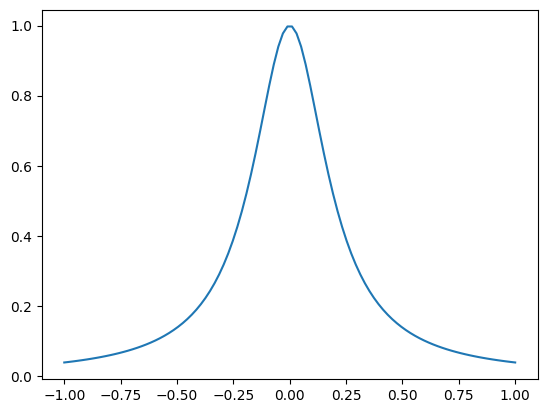

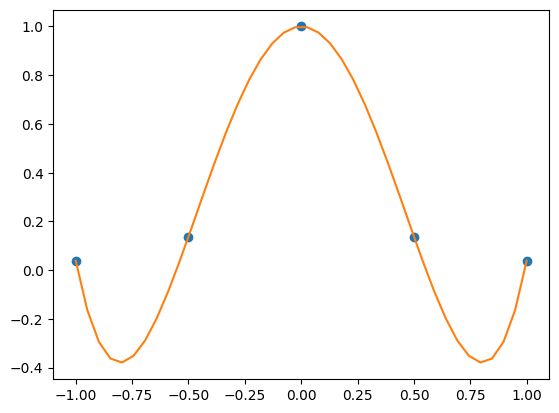

array([ 9.57213877e-01, -2.03064672e-15, -1.52674461e+01,  9.00702039e-14,
        1.24636817e+02,  1.96264879e-13, -5.07215504e+02,  3.40829448e-12,
        1.03616040e+03, -8.98814356e-12, -1.00823965e+03,  3.23052696e-11,
        3.69006630e+02, -5.63468716e-12])

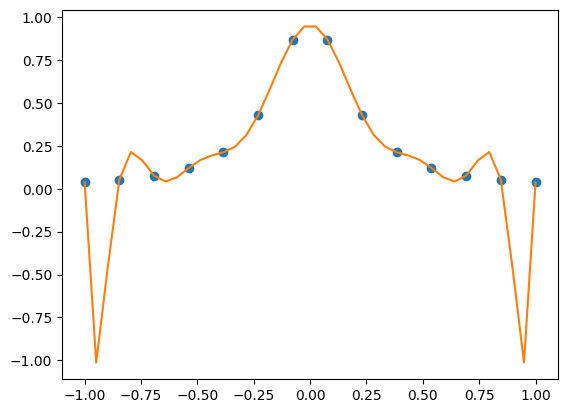

In [5]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

x = np.linspace(-1.0,1.0,100)
y = 1 / (1 + 25 * x**2)
plt.plot(x, y)
plt.show()

# Interpolamos la función r(x) usando 5 puntos en [-1,1]
xr1 = np.linspace(-1.0,1.0,5)
yr1 = 1.0/(1.0 + 25.0*(xr1**2))

poly1 = lagrange(xr1, yr1)

# Dibujamos el polinomio
xnew1 =  np.linspace(-1.0,1.0,40)
ynew1 = poly1(xnew1)   
plt.plot(xr1, yr1,'o',xnew1,ynew1,'-')
plt.show()

# Interpolamos ahora la función r(x) usando 14 puntos en [-1,1]
xr2 = np.linspace(-1.0,1.0,14)
yr2 = 1.0/(1.0 + 25.0*(xr2**2))

poly2 = lagrange(xr2, yr2)

coeficientes = Polynomial(poly2.coef[::-1]).coef
display(coeficientes)

# dibujamos el polinomio
xnew2 =  np.linspace(-1.0,1.0,40)
ynew2 = poly2(xnew2)   
plt.plot(xr2, yr2, 'o',xnew2,ynew2,'-')
plt.show()

### Interpolación lineal a trozos
Cuando se dispone de muchos datos, es frecuente emplear una interpolación lineal a trozos. En este caso, la función *interp1d* devuelve la línea poligonal que une los puntos $(x_i,y_i)$, $i=0,1,\ldots,n$. 

array(0.80480402)

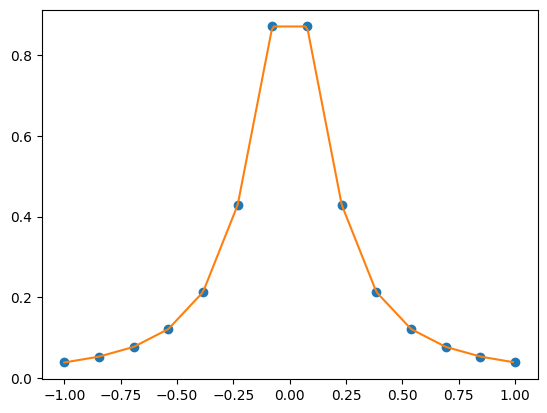

In [ ]:
#xg = np.array([-2,0,1,2,5,9,10])
xg = np.linspace(-1.0,1.0,14)
yg = 1 / (1 + 25 * xg**2)  # también podemos pasar un vector de imágenes

finter = interpolate.interp1d(xg, yg)
display(finter(-0.1))

#xnew = np.arange(-2, 10, 0.01)
xnew = np.arange(-1.0,1.0,0.01)
ynew = finter(xnew)   
plt.plot(xg, yg, 'o', xnew, ynew, '-')
plt.show()

### Ejercicio 9

En 2001, la ONU inició en Etiopía una campaña contra el hambre. Los datos de los millones de personas desnutridas cada año vienen dados por
$[32,31,30.7,29,28.3,27.9,28.3,27.8,25.3,24.2,23.5,23.4,20.8,17.4,14.9,14.3,14.9,15.7,18.2]$ 
Estima el número de personas desnutridas a mitad del año 2015 según las diferentes interpolaciones vistas. A efectos de  operaciones consideramos como año 1 el 2001 y así sucesivamente.


array([32. , 31. , 30.7, 29. , 28.3, 27.9, 28.3, 27.8, 25.3, 24.2, 23.5,
       23.4, 20.8, 17.4, 14.9, 14.3, 14.9, 15.7, 18.2])

np.float64(16.67144487913174)

ValueError: x and y must have same first dimension, but have shapes (1,) and (120,)

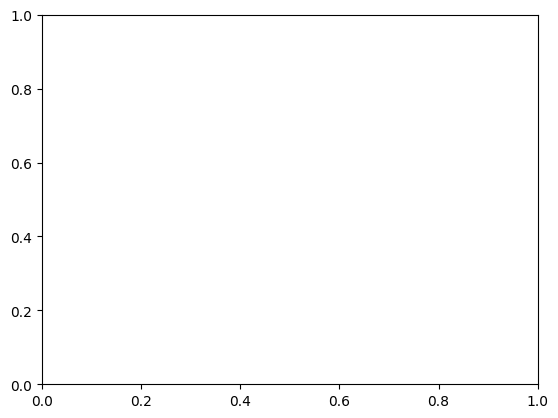

In [9]:
# TU CÓDIGO AQUÍ
yg = np.array([32,31,30.7,29,28.3,27.9,28.3,27.8,25.3,24.2,23.5,23.4,20.8,17.4,14.9,14.3,14.9,15.7,18.2])
xg = np.arange(1,20,1)
display(yg)

poly = lagrange(xg, yg)

display(poly(14.5))

xnew1 =  np.arange(1,20,20)
ynew1 = poly1(xnew)   
plt.plot(xg, yg,'o',xnew1,ynew1,'-')
plt.show()

## 5.5 Derivación numérica ##

La función *derivative* del módulo scipy.misc aproxima la derivada $n$-ésima de una función en un punto utilizando una fórmula de diferencias centradas con paso *dx*. Como argumentos, se le pasan la función *f* y el punto *x0* en el que se desea aproximar la derivada. Los parámetros *dx* (paso de integración) y *n* (orden de la derivada) son opcionales. Por defecto, *n=1*.

In [11]:
from scipy.misc import derivative

def f(x):
    return x**3 + x**2

derivative(f, 1.0, dx=1e-6) # Aproxima f'(1) usando la fórmula centrada con paso h=1e-6

ImportError: cannot import name 'derivative' from 'scipy.misc' (/home/pablo/Dev/Uni/.venv/lib/python3.10/site-packages/scipy/misc/__init__.py)

### Diferencias progresivas


La función *diff* de NumPy se puede emplear para calcular las diferencias progresivas para un conjunto de datos dado. Consideramos, por ejemplo, $\mathbf x=[1,2,5,9]$ e $\mathbf y=[-2,0,3,12]$, donde $y(x_i)=f(x_i)$ para cierta función $f$.

In [12]:
x = np.array([1,2,5,9])
y = np.array([-2,0,3,12])

d1x = np.diff(x)
display(d1x)

d1y = np.diff(y)
display(d1y)

difprogres = np.divide(d1y,d1x)
difprogres

array([1, 3, 4])

array([2, 3, 9])

array([2.  , 1.  , 2.25])

### Ejercicio 10

Para los vectores $\mathbf x$ e $\mathbf y$ del ejemplo anterior: 

a) Calcula las diferencias regresivas  en aquellos puntos que sea posible.  

b) Calcula las diferencias finitas centradas en aquellos puntos que sea posible.  

In [ ]:
#TU CÓDIGO AQUÍ

### Ejercicio 11 (adaptado de [2])

La altura $q(t)$ que alcanza en un tiempo $t$ un fluido en un cilindro recto de radio $R=1\,m$ con un agujero circular de radio  $r = 0.1\,m$ en el fondo, se ha medido cada $5\,s$, $t = [ 0, 5, 10, 15, 20]$, y se han obtenido los valores siguientes: $q =[0.6350, 0.5336, 0.4410, 0.3572, 0.2822]$.  
Aproxima la velocidad de vaciado $q'(t)$ donde sea posible mediante:

a) Diferencias progresivas   
b) Diferencias regresivas    
c) Diferencias centradas  

Se considera como valor exacto el obtenido mediante la ley de Torricelli: 
$$q'(t) = - \gamma (r/R)^2 \sqrt{2gq(t)}, \, \, \, \gamma = 0.6 , \, \, g = 9.81\,.  $$
Determina cuál es la mejor aproximación de las obtenidas anteriormente.  

In [ ]:
#TU CÓDIGO AQUÍ

## Referencias

1. R. Johansson (2019). Numerical Python. Apress
2. A. Quarteroni & F. Saleri (2006). Calculo cientifico con Matlab y Octave. Springer